In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Resize images
def resize(dst, img):
    '''
    dst là ảnh cần resize về cùng kích thước với img
    '''
    width = img.shape[1]
    height = img.shape[0]

    dim = (width, height)
    resized = cv2.resize(src=dst, dsize=dim, interpolation = cv2.INTER_AREA)
    return resized


def background_subtraction(foreground, background, weather_bg):
    foreground = cv2.GaussianBlur(foreground, (5, 5), 0)

    
    diff1 = cv2.subtract(foreground,background)
    diff2 = cv2.subtract(background,foreground)
    
    diff = diff1+diff2
    
    diff[abs(diff)<13.0]=0
    
    gray = cv2.cvtColor(diff.astype(np.uint8), cv2.COLOR_BGR2GRAY)
    gray[np.abs(gray) < 10] = 0
    foreground_mask = gray.astype(np.uint8)
    foreground_mask[foreground_mask>0]=255

    #invert the mask
    fgmask_inv = cv2.bitwise_not(foreground_mask)
    #use the masks to extract the relevant parts from FG and BG
    foreground_img = cv2.bitwise_and(foreground, foreground, mask = foreground_mask)
    weatherForecast_img = cv2.bitwise_and(weather_bg, weather_bg, mask = fgmask_inv)

    #cv2.imshow(' Observed Image', foreground)
    #cv2.imshow(' Background 1', background)
    #cv2.imshow('Segmented Object', foreground_img)
    #cv2.imwrite('segmented_img.png', foreground_img)
    #cv2.imshow('Foreground Mask', foreground_mask)
    #cv2.imwrite("foreground_mask2.png", foreground_mask)
    #cv2.waitKey(0)
    
    return foreground_img, weatherForecast_img, foreground_mask


In [3]:
# Read image
bg1 = cv2.imread('background4.png')
pg4 = cv2.imread('pg4.png')
weather_forecast_img = cv2.imread('weather_forecast.jpg')
# Resize image 
pg4_re = resize(pg4, bg1)
weather_forecast_re = resize(weather_forecast_img, bg1)

# background subtraction
foreground_img, weather_forecast_bg, foreground_mask = background_subtraction(pg4_re, bg1, weather_forecast_re)
dst = cv2.add(weather_forecast_bg, foreground_img)

<Figure size 432x288 with 0 Axes>

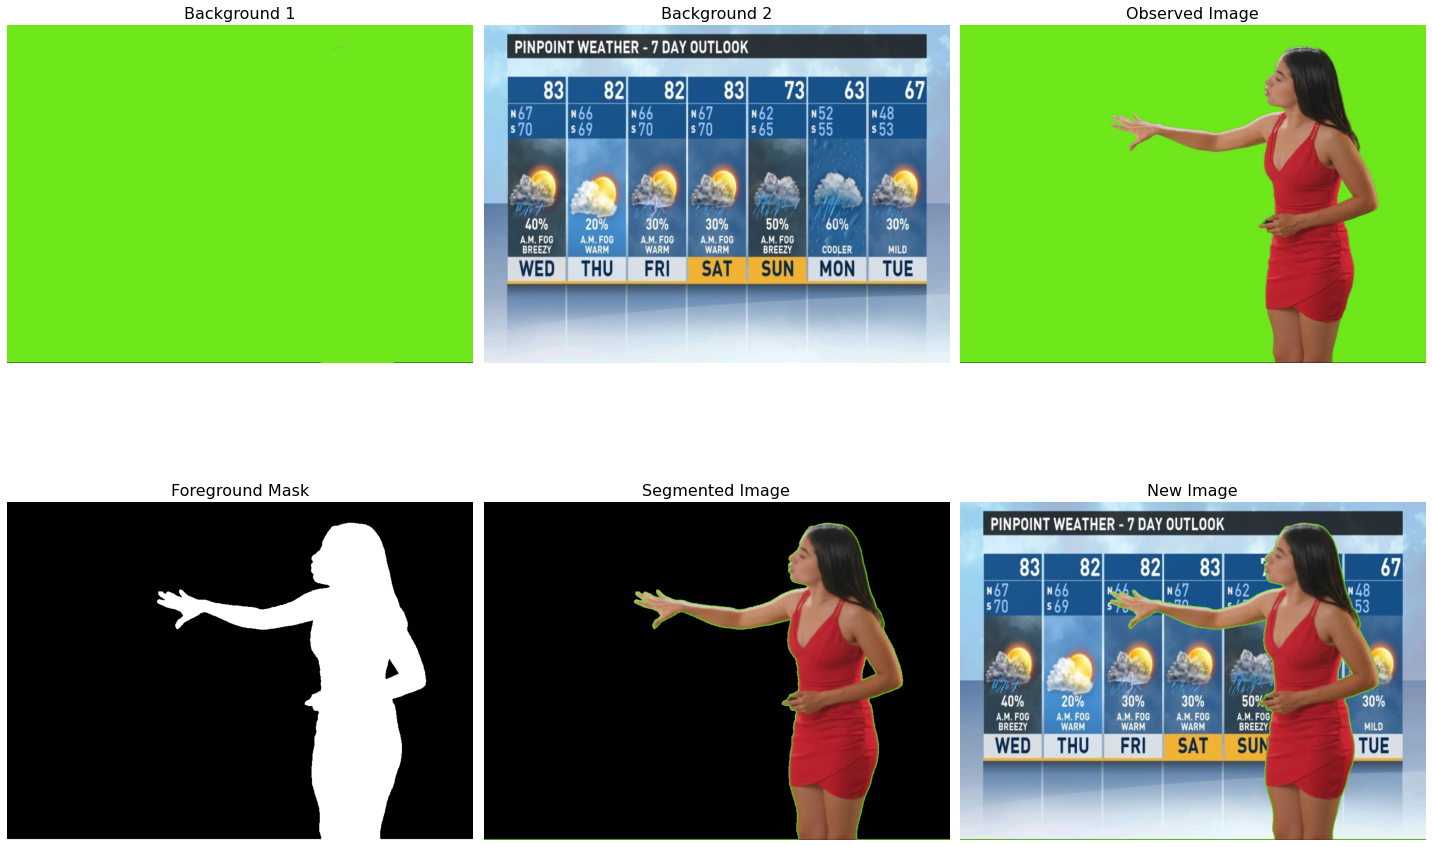

In [4]:
fig = plt.figure()

fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey = True, figsize=(20,15))
axes[0][0].imshow(cv2.cvtColor(bg1, cv2.COLOR_BGR2RGB))
axes[0][0].set_title("Background 1", fontsize=16)
axes[0][0].axis('off')

axes[0][1].imshow(cv2.cvtColor(weather_forecast_re, cv2.COLOR_BGR2RGB))
axes[0][1].set_title("Background 2", fontsize=16)
axes[0][1].axis('off')

axes[0][2].imshow(cv2.cvtColor(pg4, cv2.COLOR_BGR2RGB))
axes[0][2].set_title("Observed Image", fontsize=16)
axes[0][2].axis('off')

axes[1][0].imshow(foreground_mask, cmap="gray")
axes[1][0].set_title("Foreground Mask", fontsize=16)
axes[1][0].axis('off')

axes[1][1].imshow(cv2.cvtColor(foreground_img, cv2.COLOR_BGR2RGB))
axes[1][1].set_title("Segmented Image", fontsize=16)
axes[1][1].axis('off')

axes[1][2].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axes[1][2].set_title("New Image", fontsize=16)
axes[1][2].axis('off')

fig.tight_layout()

plt.show()